In [1]:
!pip install google-play-scraper
!pip install seaborn
!pip install Sastrawi
!pip install wordcloud
!pip3 install wordcloud
!pip install xgboost
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
from google_play_scraper import app
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nurchoir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nurchoir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
apk = 'com.gojek.app'
cnt = 300
urut = Sort.MOST_RELEVANT

In [71]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
apk,
lang='id',
country='id',
sort= urut,
count= cnt, # defaults to 100
filter_score_with=None
)

In [72]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
scrappeddata1 = data[['content','score','at', 'appVersion']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

,content,score,at,appVersion
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024-04-08 22:02:11,4.85.3
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024-04-11 20:57:58,4.85.3
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024-04-12 09:07:47,4.85.3
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024-04-12 15:33:49,4.85.3
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024-04-12 18:52:45,4.85.3


In [73]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day
sorteddata

,content,score,at,appVersion,Year,Month,Day
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024-04-08 22:02:11,4.85.3,2024,4,8
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024-04-11 20:57:58,4.85.3,2024,4,11
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024-04-12 09:07:47,4.85.3,2024,4,12
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024-04-12 15:33:49,4.85.3,2024,4,12
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024-04-12 18:52:45,4.85.3,2024,4,12
...,...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024-06-30 14:09:48,4.89.1,2024,6,30
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024-06-30 14:26:54,4.89.1,2024,6,30
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024-06-30 18:25:55,4.88.1,2024,6,30
78,Dulu hampir setiap hari make gofood karena pro...,1,2024-06-30 18:47:48,4.86.2,2024,6,30


In [74]:
df = sorteddata[['content','score','Year','Month','Day']]
df

,content,score,Year,Month,Day
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12
...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30


In [75]:
df['score'].value_counts()

score
1    165
2     40
3     38
5     34
4     23
Name: count, dtype: int64

<Axes: xlabel='score'>

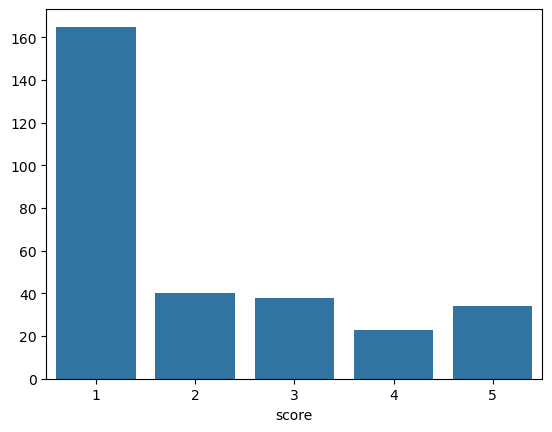

In [76]:
import seaborn as sns
result = df.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

In [77]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append('Positif')
    elif row['score'] == 3:
        sentimen.append('Netral')
    else:
        sentimen.append('Negatif')
df['sentiment'] = sentimen
df

C:\Users\Nurchoir\AppData\Local\Temp\ipykernel_9768\794691113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentimen


,content,score,Year,Month,Day,sentiment
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8,Negatif
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11,Negatif
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12,Positif
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12,Negatif
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12,Negatif
...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30,Negatif
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30,Positif
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30,Negatif
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30,Negatif


<Axes: xlabel='sentiment'>

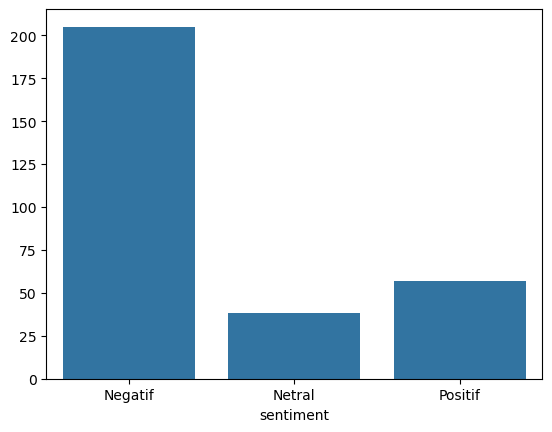

In [78]:
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

Text(0.5, 1.0, 'Pembagian Sentimen')

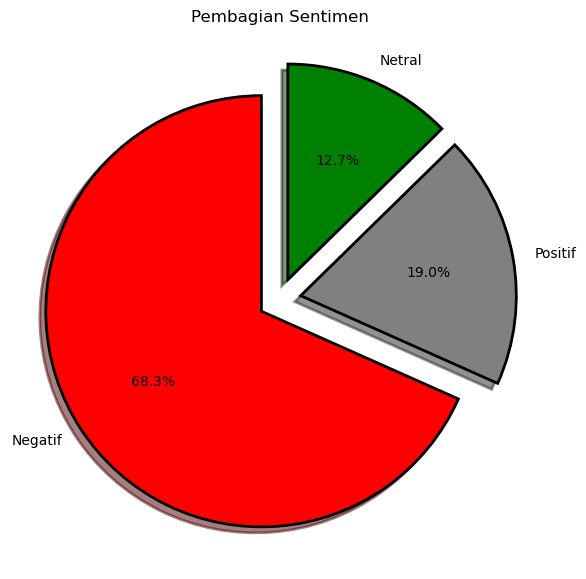

In [79]:
import matplotlib.pyplot as plt
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Pembagian Sentimen')

In [80]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3

Year  sentiment
2024  Negatif      205
      Netral        38
      Positif       57
Name: sentiment, dtype: int64

In [81]:
from nltk.tokenize import sent_tokenize, word_tokenize
df['content_token'] = df['content'].apply(lambda x: word_tokenize(x))
df

,content,score,Year,Month,Day,sentiment,content_token
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8,Negatif,"[Agak, kecewa, dengan, fitur, go, food, saya, ..."
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11,Negatif,"[2x, kejadian, Yang, pertama, restonya, membat..."
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12,Positif,"[Oke, bug, sudah, mulai, kurang, ,, yg, saya, ..."
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12,Negatif,"[Aplikasi, yang, sangat, tidak, direkomendasik..."
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12,Negatif,"[Sangat, lama, memproses, pesanan, ., Diawal, ..."
...,...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30,Negatif,"[Sudah, 2x, saya, order, tanpa, sengaja, ,, ti..."
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30,Positif,"[Tolong, tampilannya, lebih, jelas, lagi, untu..."
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30,Negatif,"[Lama, dapet, driver, gocar, .., padahal, band..."
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30,Negatif,"[Dulu, hampir, setiap, hari, make, gofood, kar..."


In [82]:
from nltk.corpus import stopwords
# Make a list of Indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['gojek']
stopwords.extend(my_stopwords)
# Remove stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df

,content,score,Year,Month,Day,sentiment,content_token
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8,Negatif,"[Agak, kecewa, fitur, go, food, pesan, makan, ..."
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11,Negatif,"[2x, kejadian, Yang, restonya, membatalkan, pe..."
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12,Positif,"[Oke, bug, ,, yg, suka, pesan, makan, ,, gopay..."
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12,Negatif,"[Aplikasi, direkomendasikan, ., Grab, shopee, ..."
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12,Negatif,"[Sangat, memproses, pesanan, ., Diawal, bilang..."
...,...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30,Negatif,"[Sudah, 2x, order, sengaja, ,, tiba2, order, ,..."
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30,Positif,"[Tolong, tampilannya, transaksi, berjalan, ,, ..."
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30,Negatif,"[Lama, dapet, driver, gocar, .., bandung, loh,..."
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30,Negatif,"[Dulu, make, gofood, promonya, banget, pembaya..."


In [83]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df

,content,score,Year,Month,Day,sentiment,content_token,stemmed
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8,Negatif,"[Agak, kecewa, fitur, go, food, pesan, makan, ...","[agak, kecewa, fitur, go, food, pesan, makan, ..."
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11,Negatif,"[2x, kejadian, Yang, restonya, membatalkan, pe...","[2x, jadi, yang, restonya, batal, pesan, suruh..."
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12,Positif,"[Oke, bug, ,, yg, suka, pesan, makan, ,, gopay...","[oke, bug, , yg, suka, pesan, makan, , gopay, ..."
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12,Negatif,"[Aplikasi, direkomendasikan, ., Grab, shopee, ...","[aplikasi, rekomendasi, , grab, shopee, food, ..."
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12,Negatif,"[Sangat, memproses, pesanan, ., Diawal, bilang...","[sangat, proses, pesan, , awal, bilang, batal,..."
...,...,...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30,Negatif,"[Sudah, 2x, order, sengaja, ,, tiba2, order, ,...","[sudah, 2x, order, sengaja, , tiba2, order, , ..."
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30,Positif,"[Tolong, tampilannya, transaksi, berjalan, ,, ...","[tolong, tampil, transaksi, jalan, , gak, dape..."
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30,Negatif,"[Lama, dapet, driver, gocar, .., bandung, loh,...","[lama, dapet, driver, gocar, , bandung, loh, ,..."
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30,Negatif,"[Dulu, make, gofood, promonya, banget, pembaya...","[dulu, make, gofood, promonya, banget, bayar, ..."


In [84]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df

,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
142,Agak kecewa dengan fitur go food saya pesan ma...,2,2024,4,8,Negatif,"[Agak, kecewa, fitur, go, food, pesan, makan, ...","[agak, kecewa, fitur, go, food, pesan, makan, ...",agak kecewa fitur food pesan makan nunggu1 jam...
223,2x kejadian Yang pertama restonya membatalkan ...,1,2024,4,11,Negatif,"[2x, kejadian, Yang, restonya, membatalkan, pe...","[2x, jadi, yang, restonya, batal, pesan, suruh...",jadi yang restonya batal pesan suruh nyari res...
210,"Oke bug sudah mulai kurang, yg saya suka disin...",5,2024,4,12,Positif,"[Oke, bug, ,, yg, suka, pesan, makan, ,, gopay...","[oke, bug, , yg, suka, pesan, makan, , gopay, ...",suka pesan makan gopay cash jadi gopaynya paka...
260,Aplikasi yang sangat tidak direkomendasikan. G...,1,2024,4,12,Negatif,"[Aplikasi, direkomendasikan, ., Grab, shopee, ...","[aplikasi, rekomendasi, , grab, shopee, food, ...",aplikasi rekomendasi grab shopee food khusus g...
41,Sangat lama memproses pesanan. Diawal bilang t...,1,2024,4,12,Negatif,"[Sangat, memproses, pesanan, ., Diawal, bilang...","[sangat, proses, pesan, , awal, bilang, batal,...",sangat proses pesan awal bilang batal menit ba...
...,...,...,...,...,...,...,...,...,...
22,"Sudah 2x saya order tanpa sengaja, tiba2 order...",1,2024,6,30,Negatif,"[Sudah, 2x, order, sengaja, ,, tiba2, order, ,...","[sudah, 2x, order, sengaja, , tiba2, order, , ...",sudah order sengaja tiba2 order nominal sudah ...
28,Tolong tampilannya lebih jelas lagi untuk tran...,4,2024,6,30,Positif,"[Tolong, tampilannya, transaksi, berjalan, ,, ...","[tolong, tampil, transaksi, jalan, , gak, dape...",tolong tampil transaksi jalan dapet dicancel k...
98,Lama dapet driver gocar..padahal bandung loh. ...,1,2024,6,30,Negatif,"[Lama, dapet, driver, gocar, .., bandung, loh,...","[lama, dapet, driver, gocar, , bandung, loh, ,...",lama dapet driver gocar bandung kota belah cep...
78,Dulu hampir setiap hari make gofood karena pro...,1,2024,6,30,Negatif,"[Dulu, make, gofood, promonya, banget, pembaya...","[dulu, make, gofood, promonya, banget, bayar, ...",dulu make gofood promonya banget bayar gopay p...


In [85]:
df['text_string'] = df['text_string'].astype('str') 
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

content                  object
score                     int64
Year                      int32
Month                     int32
Day                       int32
sentiment                object
content_token            object
stemmed                  object
text_string      string[python]
dtype: object

Citraan Visual Kata dalam Sentimen Positif


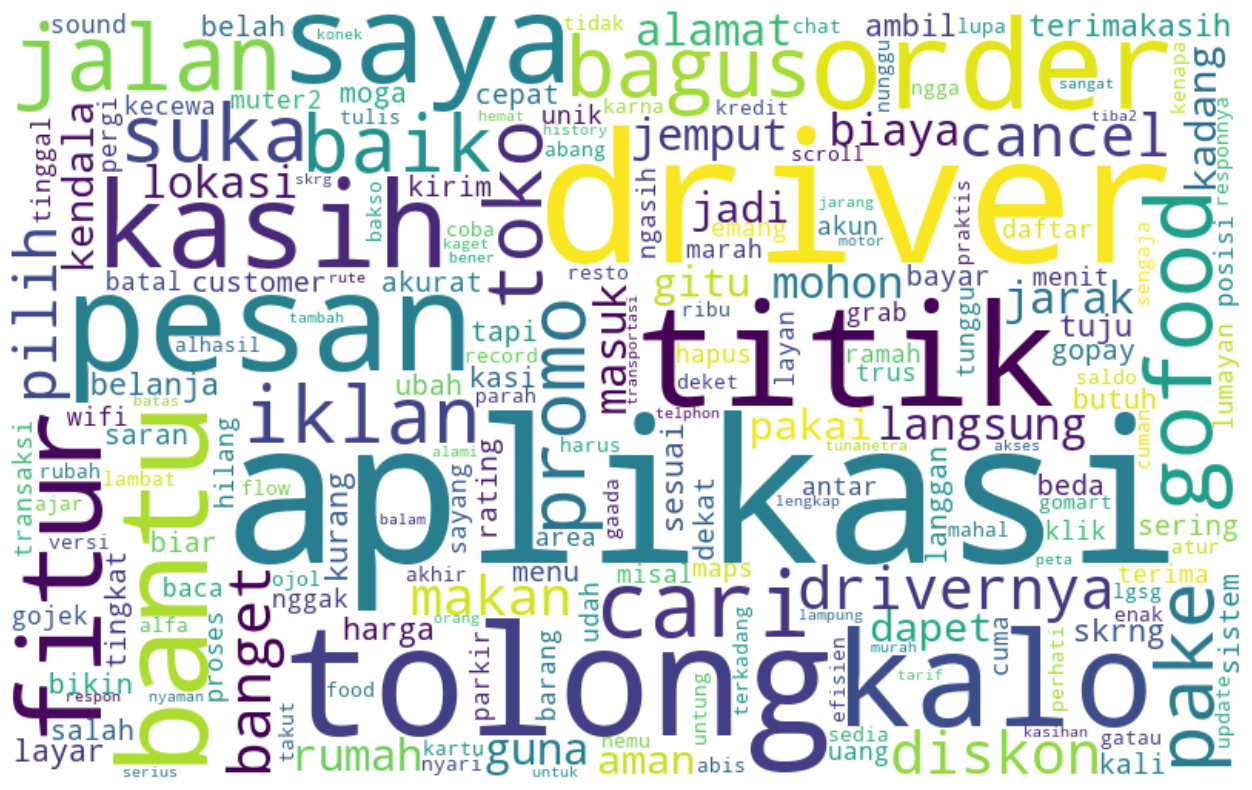

In [86]:
df_p=df[df['sentiment']=='Positif']
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Positif")

Citraan Visual Kata dalam Sentimen Netral


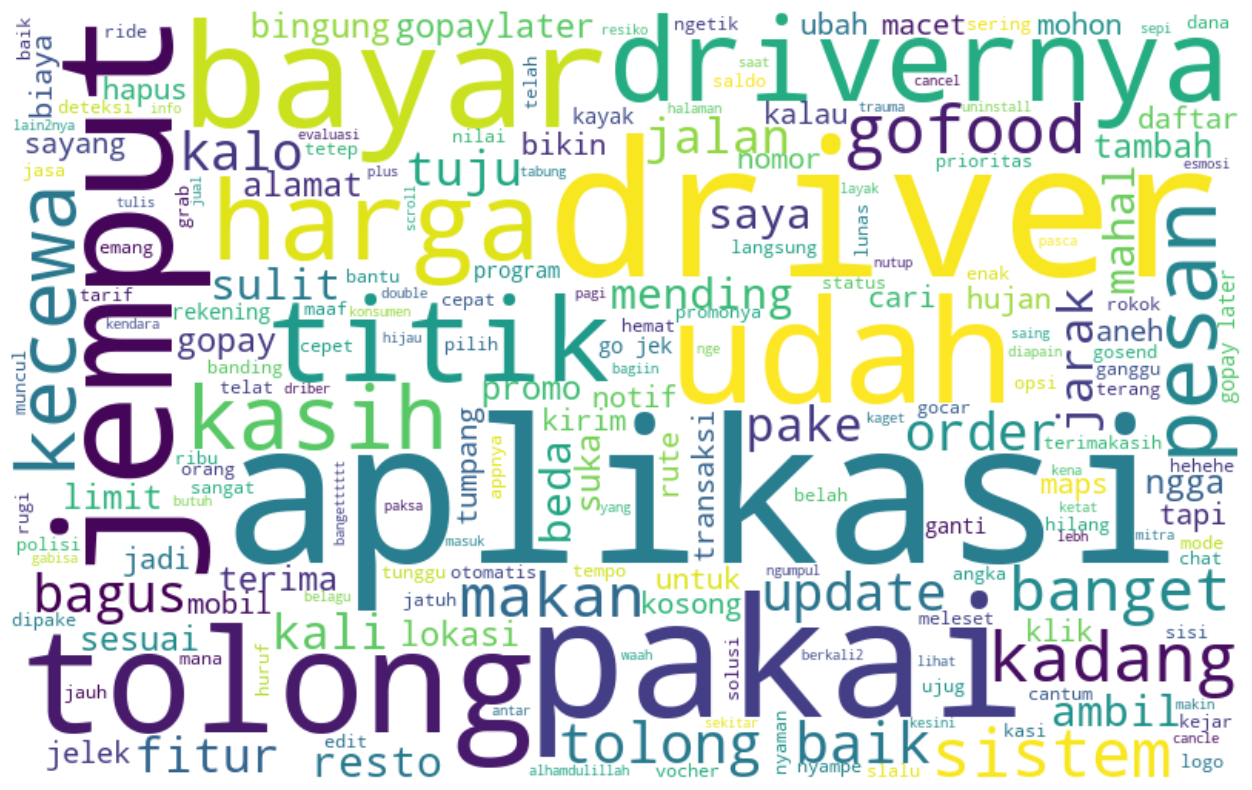

In [87]:
df_net=df[df['sentiment']=='Netral']
all_words_lemnet = ' '.join([word for word in df_net['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Netral")

Citraan Visual Kata dalam Sentimen Negatif


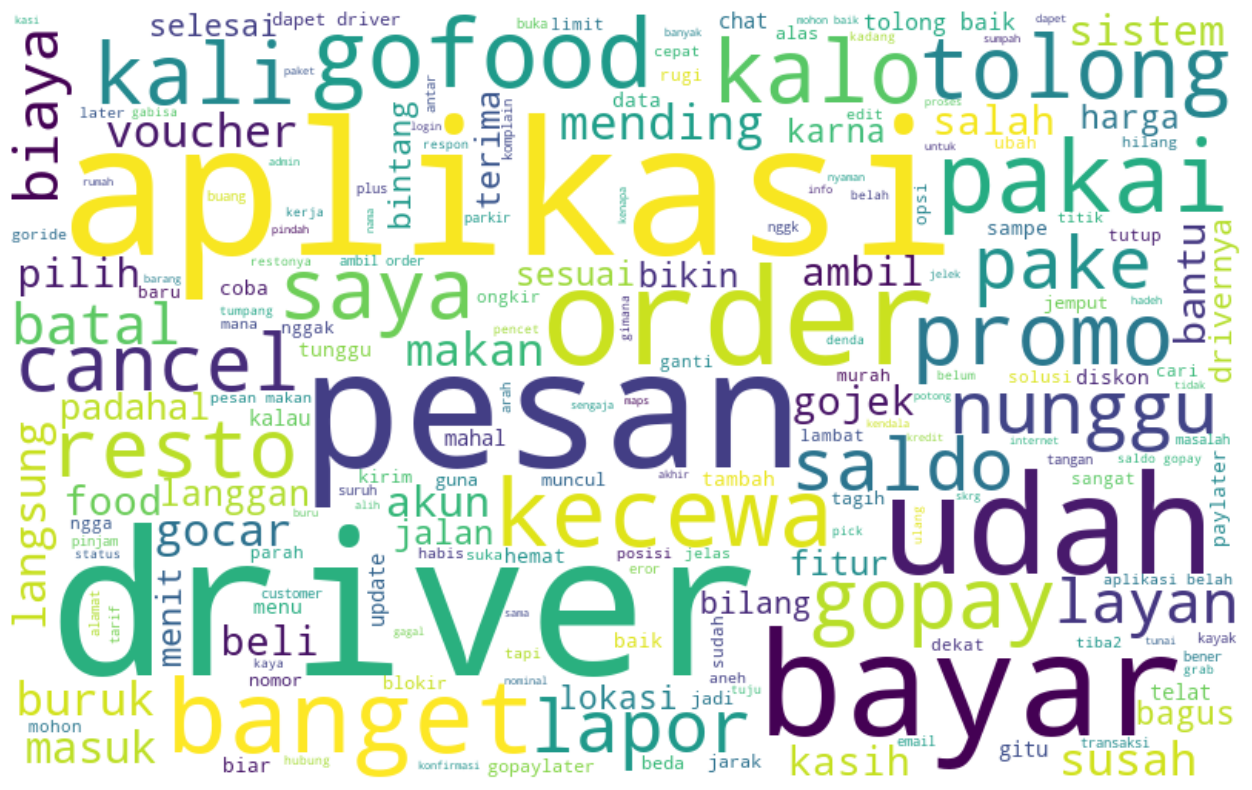

In [88]:
df_neg=df[df['sentiment']=='Negatif']
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Negatif")

In [89]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, precision_score, recall_score, f1_score # Performance Metrics
# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [90]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [91]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [92]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb1 = accuracy_score(nb_prediction,y_test)

In [93]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb2 = accuracy_score(nb_prediction,y_test)

In [94]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb3 = accuracy_score(nb_prediction,y_test)

In [95]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.4,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)
nb4 = accuracy_score(nb_prediction,y_test)

In [96]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.5,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb5 = accuracy_score(nb_prediction,y_test)

In [97]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.6,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb6 = accuracy_score(nb_prediction,y_test)

In [98]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.7,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb7 = accuracy_score(nb_prediction,y_test)

In [99]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.8,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb8 = accuracy_score(nb_prediction,y_test)

In [100]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.9,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)
nb9 = accuracy_score(nb_prediction,y_test)

In [101]:
# initialize list of lists
data_akurasi = [[90,10,(nb1*100)], [80,20,(nb2*100)],[70,30,(nb3*100)],[60,40,(nb4*100)],[50,50,(nb5*100)],[40,60,(nb6*100)],[30,70,(nb7*100)],[20,80,(nb8*100)],[10,90,(nb9*100)]]
        
# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'naive_bayes'])
  
# print dataframe.
df_akurasi

,data_train,data_tes,naive_bayes
0,90,10,83.870968
1,80,20,81.300813
2,70,30,84.864865
3,60,40,84.959350
4,50,50,81.493506
5,40,60,80.216802
6,30,70,71.229698
7,20,80,54.471545
8,10,90,40.974729


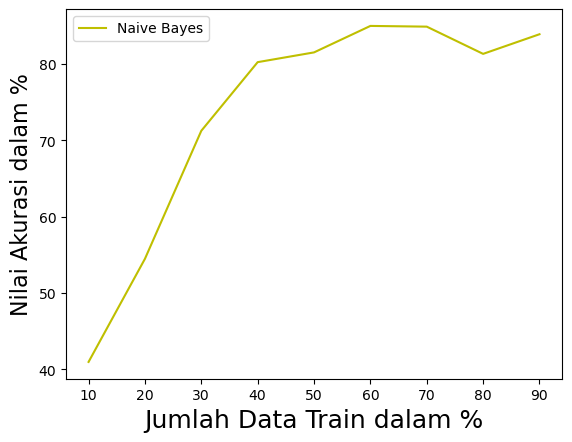

In [102]:
plt.plot(df_akurasi['data_train'], df_akurasi['naive_bayes'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

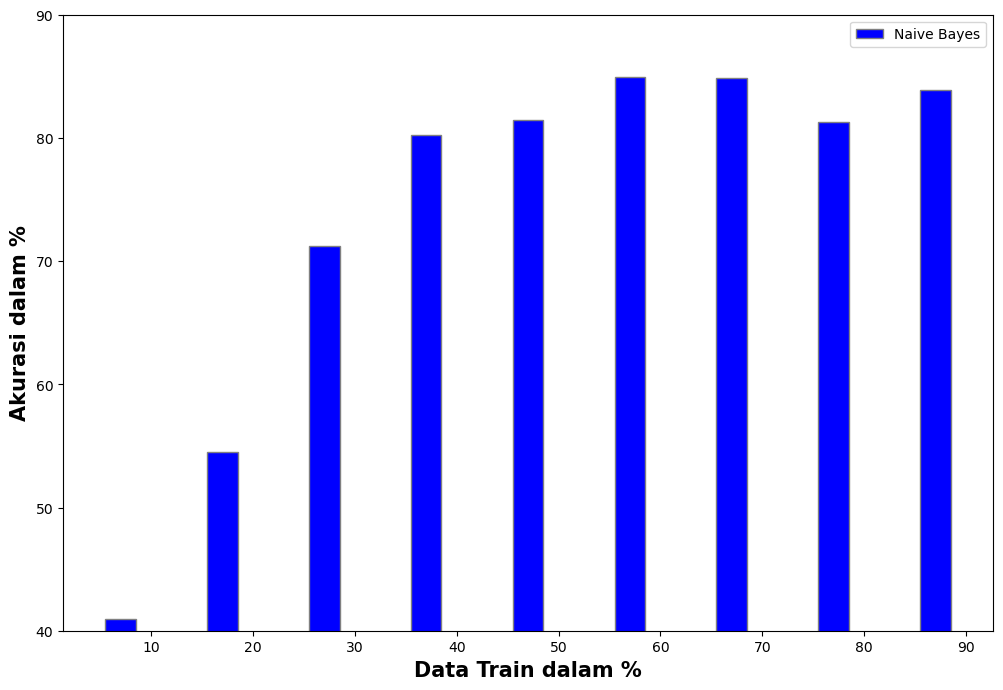

In [103]:
#sorting berdasarkan data train ascending
df_akurasi = df_akurasi.sort_values(by='data_train', ascending=True)
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
# Set position of bar on X axis
br1 = np.arange(len(df_akurasi['naive_bayes']))
# Make the plot
plt.bar(br1, df_akurasi['naive_bayes'], color ='b', width = barWidth,
  edgecolor ='grey', label ='Naive Bayes')
plt.ylim(40, 90)
# Adding Xticks
plt.xlabel('Data Train dalam %', fontweight ='bold', fontsize = 15)
plt.ylabel('Akurasi dalam %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_akurasi['naive_bayes']))],
  df_akurasi['data_train'])
plt.legend()
plt.show()

In [104]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.8486486486486486

In [105]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print('')
print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="weighted"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="weighted"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="weighted"))

print('')
print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


MultinomialNB Accuracy: 0.8486486486486486
MultinomialNB Precision: 0.854233138388068
MultinomialNB Recall: 0.8486486486486486
MultinomialNB f1_score: 0.8452019773042612

confusion_matrix:
 [[42  7 12]
 [ 5 63  2]
 [ 1  1 52]]


              precision    recall  f1-score   support

     Negatif       0.88      0.69      0.77        61
      Netral       0.89      0.90      0.89        70
     Positif       0.79      0.96      0.87        54

    accuracy                           0.85       185
   macro avg       0.85      0.85      0.84       185
weighted avg       0.85      0.85      0.85       185

